### Project 2 
This explanation are mainly from different sections of the scikit-learn tutorial on text classification available at http://scikit-learn.org.

### Dataset
1. In this project we work with “20 Newsgroups” dataset. It is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic.
2. To manually load the data, you need to run this python code.<a href="https://www.dropbox.com/s/5oek8qbsge1y64b/fetch_data.py?dl=0">link to fetch_data.py</a>
3. Easiest way to load the data is to use the built-in dataset loader for 20 newsgroups from scikit-learn package.


### Problem (a)

In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics','rec.autos']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
def get_Number(fileName):
    count_vect = CountVectorizer()
    categories = [fileName]
    comp_graphic_train = fetch_20newsgroups(subset='train', categories=categories)
    comp_graphics_number = count_vect.fit_transform(comp_graphic_train.data)
    #print("(number of documents, number of features) = (%s, %s) " % comp_graphics_number.shape)
    [r,v] = comp_graphics_number.shape
    return r

comp_graphics_number = get_Number('comp.graphics')
comp_os_mswindows_misc_number = get_Number('comp.os.ms-windows.misc')
comp_sys_ibm_pc_hardware_number = get_Number('comp.sys.ibm.pc.hardware')
comp_sys_mac_hardware_number = get_Number('comp.sys.mac.hardware')
rec_autos_number = get_Number('rec.autos')
rec_motorcycles_number = get_Number('rec.motorcycles')
rec_sport_baseball_number = get_Number('rec.sport.baseball')
rec_sport_hockey_number = get_Number('rec.sport.hockey')

In [3]:
Number_Computer_technology = comp_graphics_number+comp_os_mswindows_misc_number+comp_sys_ibm_pc_hardware_number+comp_sys_mac_hardware_number
Number_Recreational_activity = rec_autos_number+rec_motorcycles_number+rec_sport_baseball_number+rec_sport_hockey_number

print("Number of class is = %s" % Number_Computer_technology)
print("Number of class is = %s" % Number_Recreational_activity)

import numpy as np
import matplotlib.pyplot as plt

n_groups = 8

document_number = (comp_graphics_number, comp_os_mswindows_misc_number, comp_sys_ibm_pc_hardware_number, comp_sys_mac_hardware_number, rec_autos_number, rec_motorcycles_number, rec_sport_baseball_number, rec_sport_hockey_number)

# fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

Number of class is = 2343
Number of class is = 2389


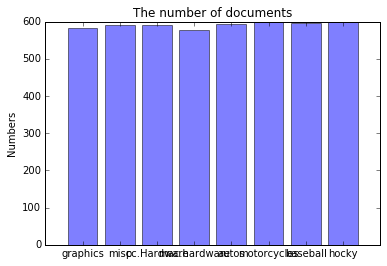

In [4]:
objects = ('graphics', 'misc', 'pc.Hardware', 'mac.hardware', 'autos', 'motorcycles','baseball','hocky')
y_pos = np.arange(len(objects))

%matplotlib inline
plt.figure()
plt.bar(y_pos, document_number, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numbers')
plt.title('The number of documents')
plt.show()


### Problem (b)

In [5]:
from sklearn.feature_extraction import text
import string
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
stop_words = text.ENGLISH_STOP_WORDS.union(string.punctuation)

In [6]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:

In [313]:
import nltk
import re
import string
#import regex as re
# stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def remove_punctuation(text):
    return re.sub(r'[^A-Za-z]', " ", text)
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    
    tokens =[word for sent in nltk.sent_tokenize(remove_punctuation(text)) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            filtered_tokens.append(token)
            
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [315]:
count_vect = TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=1,stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
# count_vect = CountVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
# X_train_counts = count_vect.fit_transform(stemmed)
X_train_counts = count_vect.fit_transform(twenty_train.data)
print X_train_counts.shape
#X_train_counts
#print(X_train_counts[0,3949])
#0, 6035
# print (count_vect.get_feature_names())

(11314, 69735)


In [316]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#print (X_train_tfidf)
# X_train_tfidf.toarray()[:30,:10]

In [317]:
# nltk.download()

### Problem (c)

In [319]:
def get_max_feature(fileName):
    categories = [fileName]
    twenty_train_c = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
    count_vect_c = TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=1,max_features=10, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
#     count_vect_c = TfidfVectorizer(min_df=1, max_features=10, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
    X_train_counts_c = count_vect_c.fit_transform(twenty_train_c.data)
    return count_vect_c.vocabulary_.keys()


print (get_max_feature('comp.sys.ibm.pc.hardware'))
print (get_max_feature('comp.sys.mac.hardware'))
print (get_max_feature('misc.forsale'))
print (get_max_feature('soc.religion.christian'))

[u'subject', u'drive', u'line', u'organ', u'com', u'card', u'scsi', u'edu', u'control', u'use']
[u'drive', u'line', u'subject', u'organ', u'edu', u'problem', u'post', u'use', u'mac', u'appl']
[u'new', u'subject', u'sale', u'univers', u'line', u'organ', u'com', u'post', u'edu', u'use']
[u'peopl', u'say', u'believ', u'subject', u'line', u'jesus', u'organ', u'god', u'christian', u'edu']


### Problem (d)

In [320]:
from sklearn.decomposition import TruncatedSVD
tsv = TruncatedSVD(n_components=50,algorithm='arpack')
X_train_lsi = tsv.fit_transform(X_train_counts)
print (X_train_lsi.shape)

(1178, 50)


### Problem (e)

In [474]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
twenty_train_target = [ int(x / 4) for x in twenty_train.target]
twenty_test_target = [ int(x / 4) for x in twenty_test.target]
#print twenty_test_target
#count_vect = TfidfVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
#X_train_counts = count_vect.fit_transform(twenty_train.data)
#print twenty_train.target
#print twenty_train_target

In [460]:
def data_process(twenty_test):
#     count_vect_test = TfidfVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
    count_vect_test = TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=1,stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
    X_test_counts = count_vect_test.fit_transform(twenty_test.data)
    tsv_test = TruncatedSVD(n_components=50,algorithm='arpack')
    X_test_lsi = tsv_test.fit_transform(X_test_counts)
    return X_test_lsi

In [462]:
from sklearn.svm import LinearSVC
X_train_lsi=data_process(twenty_train)
clf = LinearSVC(C=10e20).fit(X_train_lsi, twenty_train_target)

In [463]:
X_test_lsi = data_process(twenty_test)
predicted = clf.predict(X_test_lsi)
print predicted
score = clf.score(X_test_lsi, twenty_test_target)
print score

[0 0 0 ..., 1 1 0]
0.662929475588


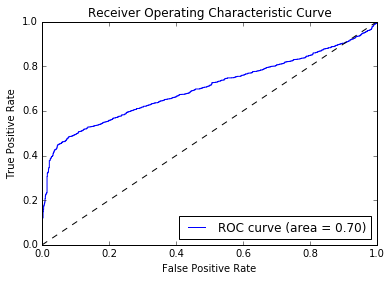

In [465]:
from sklearn.metrics import roc_curve, auc
y_score=clf.decision_function(X_test_lsi)
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
#average_precision = average_precision_score(twenty_test.target, y_score)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [466]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

[[1106   69]
 [ 863  727]]


##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [467]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

0.662929475588


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [471]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

0.91331658291457285

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [472]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

0.45723270440251573

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [ ]:
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import average_precision_score
#from sklearn.preprocessing import label_binarize
#X_train = X_train_lsi
#X_test = X_test_lsi
#y_train = twenty_train.target
#y_test = twenty_test.target
#y_score = clf.decision_function(X_test_lsi)
#y = label_binarize(twenty_train.target, classes=[0, 1])
# n_classes = y.shape
#print n_classes
# Compute Precision-Recall and plot curve
#precision = dict()
#recall = dict()
#average_precision = dict()
#for i in range(n_classes):
#precision, recall, _ = precision_recall_curve(y_test,y_score)    
#average_precision = average_precision_score(y_test, y_score)
#average_recall = average_recall_score(y_test, y_score)

#print precision
#print recall
#print average_precision
#print average_recall

### Problem (f)

In [489]:
from sklearn.cross_validation import KFold
kf = KFold(n=len(twenty_train_target), n_folds=5, shuffle=False, random_state=None)
twenty_train_data = data_process(twenty_train)
twenty_test_data = data_process(twenty_test)
l = [[0]*7 for i in range(5)]
i=0
j=0
#la=[]
for train_index, test_index in kf:
    #print train_index
    #[ int(x / 4) for x in twenty_train.target]
    X_train_soft, X_test_soft = twenty_train_data[train_index], twenty_train_data[test_index]
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        target_train = [ int(x / 4) for x in twenty_train.target[train_index]]
        target_test = [ int(x / 4) for x in twenty_train.target[test_index]]
        clf_soft = LinearSVC(C=10**k).fit(X_train_soft, target_train)
        #predicted_soft = clf.predict(X_test_soft_lsi)
        score = clf_soft.score(X_test_soft, target_test)
        #if k==1:
        #    print score
        #la.append(score)
        l[i][j]=score
        j=j+1
        #print 1
    i=i+1
    j=0

#print train_index
#twenty_train.data
#print (l)
#print la
# twenty_train_target[1]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1

In [488]:
#twenty_train.target[train_index]

array([4, 0, 0, ..., 5, 1, 4])

In [490]:
average_s = list(map(lambda x: (x[0]+x[1]+x[2]+x[3]+x[4])/5, zip(l[0], l[1], l[2], l[3], l[4])))
#print average_s
value = max(average_s)
index=average_s.index(value)
#print index
penalty = [-3, -2, -1, 0, 1, 2, 3]
print ('The best penalty value is',10**penalty[index])

('The best penalty value is', 10)


In [491]:
clf_soft_pre = LinearSVC(C=10**1).fit(twenty_train_data, twenty_train_target)
predicted_soft_pre = clf_soft_pre.predict(twenty_test_data)

s = clf_soft_pre.score(twenty_test_data, twenty_test_target)
print s

0.672694394213


##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [492]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted_soft_pre
print confusion_matrix(y_true, y_pred)

[[1068  107]
 [ 798  792]]


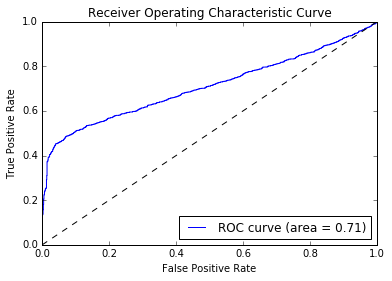

In [493]:
from sklearn.metrics import roc_curve, auc
y_score=clf_soft_pre.decision_function(twenty_test_data)
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [494]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
print accuracy_score(y_true, y_pred)

0.672694394213


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [495]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
precision_score(y_true, y_pred)  

0.88097886540600667

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [496]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
recall_score(y_true, y_pred) 

0.49811320754716981

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [497]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from sklearn.preprocessing import label_binarize
# X_train = X_train_lsi
# X_test = X_test_lsi
# y_train = twenty_train.target
# y_test = twenty_test.target
# y_score = clf_soft_pre.decision_function(X_test_lsi)
# y = label_binarize(twenty_train.target, classes=[0, 1])
# # n_classes = y.shape
# #print n_classes
# # Compute Precision-Recall and plot curve
# precision = dict()
# recall = dict()
# average_precision = dict()
# #for i in range(n_classes):
# precision, recall, _ = precision_recall_curve(y_test,y_score)    
# average_precision = average_precision_score(y_test, y_score)

# # print precision
# # print recall
# print average_precision

### Problem (g)

##### Naïve Bayes Algorithm [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [498]:
from sklearn.naive_bayes import GaussianNB
clf_naive_bayes = GaussianNB().fit(X_train_lsi, twenty_train_target)

In [499]:
X_test_lsi = data_process(twenty_test)
predicted = clf_naive_bayes.predict(X_test_lsi)
print predicted.shape
score = clf_naive_bayes.score(X_test_lsi, twenty_test_target)
print score

(2765,)
0.577576853526


##### ROC curve [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

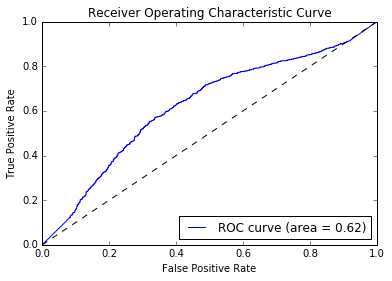

In [500]:
from sklearn.metrics import roc_curve, auc
y_score=clf_naive_bayes.predict_proba(X_test_lsi)[:, 1]
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [501]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

[[861 314]
 [854 736]]


##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [502]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

0.577576853526


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [503]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

0.70095238095238099

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [504]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

0.4628930817610063

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [505]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from sklearn.preprocessing import label_binarize
# X_train = X_train_lsi
# X_test = X_test_lsi
# y_train = twenty_train.target
# y_test = twenty_test.target
# y_score = clf_naive_bayes.predict_proba(X_test_lsi)[:, 1]
# y = label_binarize(twenty_train.target, classes=[0, 1])
# # n_classes = y.shape
# #print n_classes
# # Compute Precision-Recall and plot curve
# precision = dict()
# recall = dict()
# average_precision = dict()
# #for i in range(n_classes):
# precision, recall, _ = precision_recall_curve(y_test,y_score)    
# average_precision = average_precision_score(y_test, y_score)
# #average_recall = average_recall_score(y_test, y_score)

# # print precision
# #print recall
# #print average_precision

### Problem (h)

###### logistic regression [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [506]:
from sklearn.linear_model import LogisticRegression
clf_logistic_regression = LogisticRegression().fit(X_train_lsi, twenty_train_target)

In [507]:
X_test_lsi = data_process(twenty_test)
predicted = clf_logistic_regression.predict(X_test_lsi)
print predicted.shape
score = clf_logistic_regression.score(X_test_lsi, twenty_test_target)
print score

(2765,)
0.704159132007


##### ROC curve [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

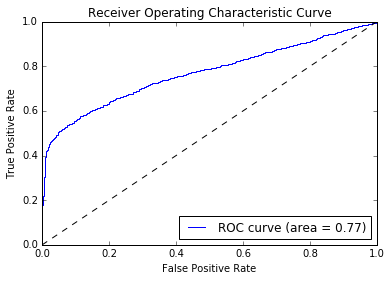

In [508]:
from sklearn.metrics import roc_curve, auc
y_score=clf_logistic_regression.predict_proba(X_test_lsi)[:, 1]
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [509]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

[[1050  125]
 [ 693  897]]


##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [510]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

0.704159132007


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [511]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

0.87769080234833663

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [512]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

0.5641509433962264

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [513]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from sklearn.preprocessing import label_binarize
# X_train = X_train_lsi
# X_test = X_test_lsi
# y_train = twenty_train.target
# y_test = twenty_test.target
# y_score = clf_logistic_regression.predict_proba(X_test_lsi)[:, 1]
# y = label_binarize(twenty_train.target, classes=[0, 1])
# # n_classes = y.shape
# #print n_classes
# # Compute Precision-Recall and plot curve
# precision = dict()
# recall = dict()
# average_precision = dict()
# #for i in range(n_classes):
# precision, recall, _ = precision_recall_curve(y_test,y_score)    
# average_precision = average_precision_score(y_test, y_score)

# # print precision
# # print recall
# print average_precision

### Problem (i)

In [570]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#from sklearn.svm import LinearSVC
categories_i = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
twenty_train_i = fetch_20newsgroups(subset='train', categories=categories_i, shuffle=True, random_state=42)
twenty_test_i = fetch_20newsgroups(subset='test', categories=categories_i, shuffle=True, random_state=42)
twenty_train_lsi_i = data_process(twenty_train_i)
twenty_test_lsi_i = data_process(twenty_test_i)
#OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)
#OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

In [571]:
#y = label_binarize(y, classes=[0, 1, 2])
#n_classes = y.shape[1]

In [572]:
y = twenty_train_i.target
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]
#print n_classes
y_test = twenty_test_i.target
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])

In [573]:
#print twenty_train_i.target

##### One VS Rest

In [574]:
fit_i = OneVsRestClassifier(LinearSVC()).fit(twenty_train_lsi_i, twenty_train_i.target)
predict_i = fit_i.predict(twenty_test_lsi_i)
score = fit_i.score(twenty_test_lsi_i, twenty_test_i.target)
#predict_score = fit_i.decision_function(twenty_test_lsi_i)
print score

0.483706070288


In [575]:
fpr = dict()
tpr = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],predict_score[:, i])

#print precision
#print recall

print precision_score(twenty_test_i.target, predict_i,average='weighted')  
print recall_score(twenty_test_i.target, predict_i,average='weighted') 
print accuracy_score(twenty_test_i.target, predict_i)
print confusion_matrix(twenty_test_i.target, predict_i)

0.498699298968
0.483706070288
0.483706070288
[[134 169  89   0]
 [101 196  87   1]
 [ 70 252  66   2]
 [ 18  11   8 361]]


##### One VS One

In [555]:
fit_i = OneVsOneClassifier(LinearSVC()).fit(twenty_train_lsi_i, twenty_train_i.target)
predict_i = fit_i.predict(twenty_test_lsi_i)
score = fit_i.score(twenty_test_lsi_i, twenty_test_i.target)
#predict_score = fit_i.decision_function(twenty_test_lsi_i)
print score 

0.475399361022


In [559]:
fpr = dict()
tpr = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],predict_score[:, i])

#print precision
#print recall
print precision_score(twenty_test_i.target, predict_i,average='weighted')  
print recall_score(twenty_test_i.target, predict_i, average='weighted') 
print accuracy_score(twenty_test_i.target, predict_i)
print confusion_matrix(twenty_test_i.target, predict_i)

0.494812644274
0.475399361022
0.475399361022
[[139 164  89   0]
 [ 99 191  95   0]
 [ 83 242  64   1]
 [ 15  23  10 350]]


##### Naive bayes

In [560]:
clf_naive_bayes = GaussianNB().fit(twenty_train_lsi_i, twenty_train_i.target)
predicted = clf_naive_bayes.predict(twenty_test_lsi_i)
print predicted.shape
score = clf_naive_bayes.score(twenty_test_lsi_i, twenty_test_i.target)
print score

print precision_score(twenty_test_i.target, predicted,average='weighted')  
print recall_score(twenty_test_i.target, predicted,average='weighted') 
print accuracy_score(twenty_test_i.target, predicted)
print confusion_matrix(twenty_test_i.target, predicted)

(1565,)
0.476038338658
0.51796830675
0.476038338658
0.476038338658
[[153 132 105   2]
 [ 86 157 136   6]
 [102 113 167   8]
 [ 57  35  38 268]]
